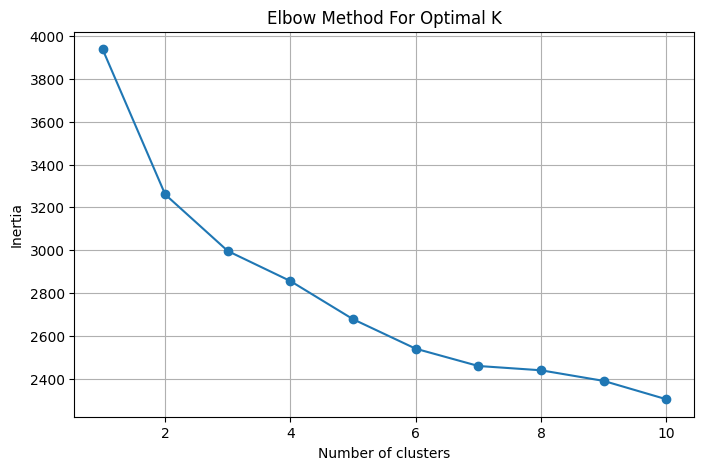

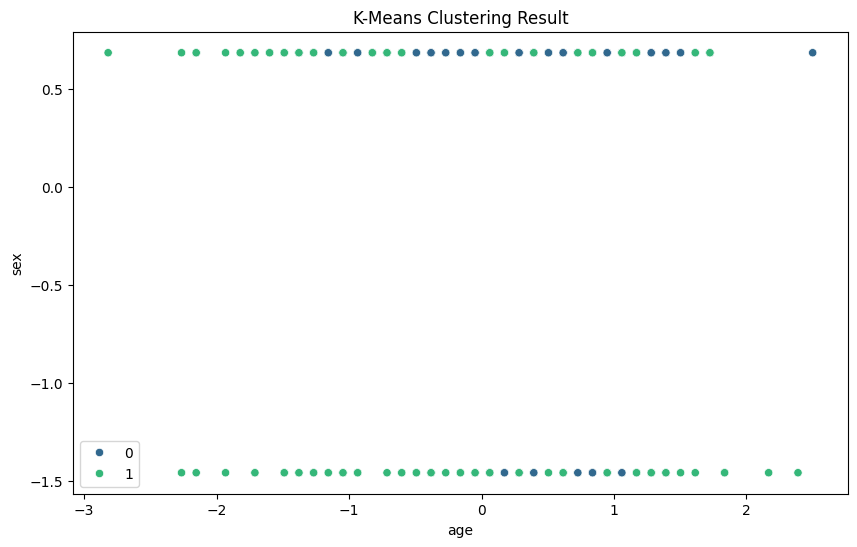

Adjusted Rand Index (KMeans vs True Labels): 0.4469


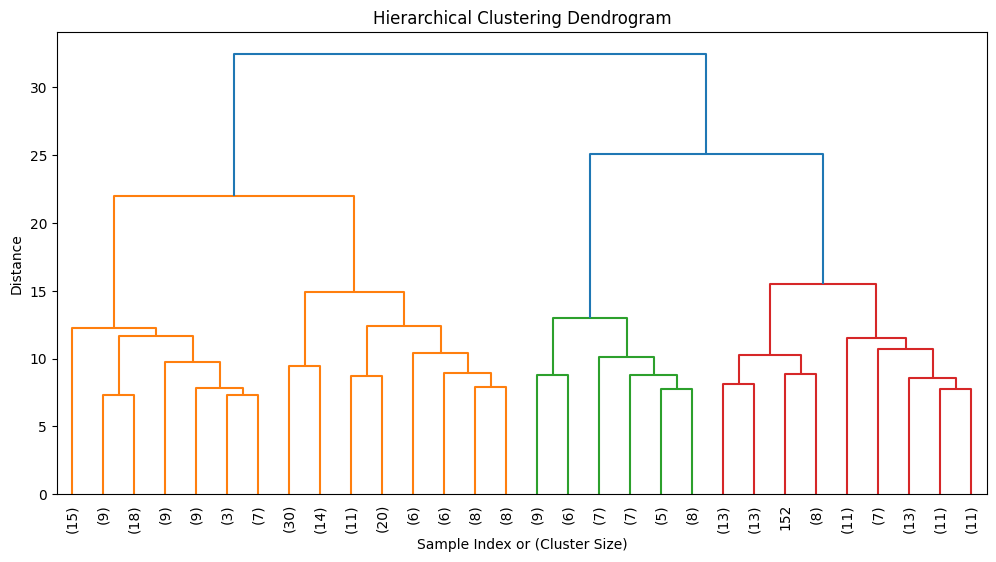

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('../data/heart_disease_clean.csv')
X = df.drop('num', axis=1)
y = df['num']

# 2. KMeans + Elbow
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering Result')
plt.show()

print(f"Adjusted Rand Index (KMeans vs True Labels): {adjusted_rand_score(y, clusters):.4f}")

# 3. Hierarchical
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90.)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()